# MNIST - Hello World of Deep Learning

**Problem statement:** 
<br><br>
Classify grayscale image of handwritten digits (28 x 28 pixels) into 10 categories (0 through 9).

---

In [1]:
import keras
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

from keras import models
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

2.4.3
2.2.0


**Import MNIST dataset**

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

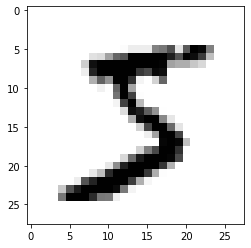

In [3]:
plt.imshow(train_images[0], cmap = plt.cm.binary)

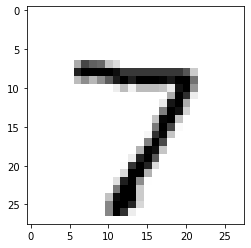

In [4]:
plt.imshow(test_images[0], cmap = plt.cm.binary)

**Preparing the image data**

In [5]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float')/255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float')/255

In [6]:
np.shape(train_images)

(60000, 784)

**Preparing the labels**

In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

---

## Network: Dense Layers

**The network architecture**

In [9]:
network_dense = Sequential()
network_dense.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network_dense.add(layers.Dense(10, activation='softmax'))

In [10]:
network_dense.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 401920
# Input is 28x28
# bias= 512
28*28*512+512

401920

Two Dense Layers.

**The compilation step**

In [12]:
network_dense.compile(optimizer='rmsprop', 
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

**Fit (train dataset)**

In [13]:
network_dense.fit(train_images, train_labels, epochs=5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2589 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1049 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0692 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0500 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0378 - accuracy: 0.9886


Train Accurancy = 98.9%

**Evaluate (test dataset)**

In [14]:
# Evaluate
test_loss, test_acc = network_dense.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.9793
test_acc: 0.9793000221252441


Test Accurancy = 98.0%

---

## Network: convnets

**Import MNIST dataset**

In [15]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Preparing the image data**

In [16]:
train_images = train_images.reshape((60000, 28, 28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

**Preparing the labels**

In [17]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**The network architecture**

In [18]:
# convnet
model_convnet = models.Sequential()
model_convnet.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)))
model_convnet.add(layers.MaxPooling2D((2,2)))
model_convnet.add(layers.Conv2D(64, (3,3), activation='relu'))
model_convnet.add(layers.MaxPooling2D((2,2)))
model_convnet.add(layers.Conv2D(64,(3,3), activation='relu'))

# add a dense layer
model_convnet.add(layers.Flatten())
model_convnet.add(layers.Dense(64, activation ='relu'))
model_convnet.add(layers.Dense(10,activation ='softmax'))

Note: input_shape = (28,28,1) => (image_height, image_width,image_channels)


Conv2D(output_depth, (window_height, window_width)) <br><br>
(window_height, window_width) =>typ. 3x3 (common choice) or 5x5 <br>
output_depth => Depth of the output feature map

In [19]:
model_convnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

**The compilation step**

In [20]:
model_convnet.compile(optimizer='rmsprop', 
                      loss = 'categorical_crossentropy',
                      metrics=['accuracy'])

**Fit (train dataset)**

In [21]:
model_convnet.fit(train_images, train_labels, epochs=5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 35s 37ms/step - loss: 0.1766 - accuracy: 0.9451
Epoch 2/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0468 - accuracy: 0.9857
Epoch 3/5
938/938 [==============================] - 37s 39ms/step - loss: 0.0322 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 41s 43ms/step - loss: 0.0242 - accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 42s 45ms/step - loss: 0.0195 - accuracy: 0.9941


Train Accurancy = 99.3%

**Evaluate (test dataset)**

In [22]:
# Evaluate
test_loss, test_acc = model_convnet.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0299 - accuracy: 0.9916
test_acc: 0.991599977016449


Test Accurancy = 99.0%

# Note

The fundamental difference between a densely connected layer and a convolution layer is this: 
- Dense layers learn global patterns in their input feature space 
- Convolution layers learn local patterns

# [EOF]